In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, confusion_matrix
import os
import seaborn as sns

In [2]:
RANDOM_SEED = 30
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
df_dataset = pd.read_csv("processed_friday_dataset.csv")

In [4]:
df_dataset.head(7)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,250,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
6,5964033,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [5]:
df_dataset.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
Flow Duration,1.000000,0.065762,0.050501,0.055225,0.038874,-0.104834,-0.091865,-0.205232,-0.154183,0.180287,...,0.151238,0.189464,0.106698,0.735462,0.176962,0.740519,0.723473,-0.117042,0.026200,-0.197090
Tot Fwd Pkts,0.065762,1.000000,0.635350,0.103128,0.630919,0.017152,-0.015677,-0.003034,-0.000364,0.062298,...,0.042805,0.054874,0.028800,0.015282,0.028033,0.016804,0.013202,-0.019522,0.015875,-0.020985
Tot Bwd Pkts,0.050501,0.635350,1.000000,0.077872,0.998874,0.006555,-0.007668,-0.009718,-0.006249,0.048298,...,0.021589,0.031410,0.018245,0.013956,0.026362,0.015327,0.012119,-0.008758,0.009451,-0.011429
TotLen Fwd Pkts,0.055225,0.103128,0.077872,1.000000,0.064594,0.246949,-0.015684,0.280816,0.205578,0.201539,...,0.014407,0.025733,0.011949,-0.013473,0.021498,-0.012017,-0.015351,-0.098062,0.104103,-0.114705
TotLen Bwd Pkts,0.038874,0.630919,0.998874,0.064594,1.000000,0.000966,-0.004092,-0.013912,-0.009573,0.035464,...,0.020168,0.029091,0.017200,0.012916,0.023706,0.014140,0.011318,-0.004600,0.004897,-0.007766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Max,0.740519,0.016804,0.015327,-0.012017,0.014140,-0.162093,-0.052820,-0.206958,-0.174473,0.001615,...,0.043853,0.058256,0.042148,0.997894,0.159618,1.000000,0.992195,-0.080845,0.014663,-0.128164
Idle Min,0.723473,0.013202,0.012119,-0.015351,0.011318,-0.160271,-0.052828,-0.204046,-0.170801,-0.006847,...,0.023647,0.036672,0.030641,0.998045,0.037636,0.992195,1.000000,-0.080502,0.016248,-0.125166
Protocol_17,-0.117042,-0.019522,-0.008758,-0.098062,-0.004600,-0.384751,0.774365,-0.286371,-0.406063,-0.231541,...,-0.013039,-0.017858,-0.012737,-0.080903,-0.008670,-0.080845,-0.080502,1.000000,-0.953705,-0.183645
Protocol_6,0.026200,0.015875,0.009451,0.104103,0.004897,0.406648,-0.738216,0.316384,0.425857,0.250291,...,-0.071454,-0.081624,-0.053601,0.015635,-0.011939,0.014663,0.016248,-0.953705,1.000000,0.191141


In [6]:
features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min', 'Protocol_17', 'Protocol_6']

In [7]:
input_vars = df_dataset[features]
target_vars = df_dataset[['Label']]

In [8]:
print(len(input_vars) == len(target_vars))

True


In [9]:
input_ar = np.array(input_vars)
target_ar = np.array(target_vars)

In [10]:
print(input_ar.shape)
print(target_ar.shape)

(1364431, 72)
(1364431, 1)


### Splitting in 70-30

In [11]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(input_ar, target_ar, test_size=0.3,random_state=RANDOM_SEED)

### Converting to tensors

In [12]:
inputs_train = torch.from_numpy(inputs_train.astype(np.float32)).to(DEVICE)
inputs_test = torch.from_numpy(inputs_test.astype(np.float32)).to(DEVICE)
targets_train = torch.from_numpy(targets_train.astype(np.float32)).to(DEVICE)
targets_test = torch.from_numpy(targets_test.astype(np.float32)).to(DEVICE)

In [13]:
class AnomalyDetectorNet(nn.Module):
    def __init__(self,no_of_features):
        super(AnomalyDetectorNet, self).__init__()
        self.linear1 = nn.Linear(no_of_features,no_of_features*2)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(no_of_features*2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, targets_train ):
        out = self.linear1(targets_train)
        out  = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        
        return out

model = AnomalyDetectorNet(no_of_features=72).to(DEVICE)

In [27]:
model

AnomalyDetectorNet(
  (linear1): Linear(in_features=72, out_features=144, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=144, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [14]:
LR = 0.001
NUM_EPOCHS = 3*50

In [15]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [16]:
loss_hist = []
acc_hist = []
for epoch in range(NUM_EPOCHS):
    targets_preds = model(inputs_train)
    
    loss = loss_fn(targets_preds,targets_train)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if(epoch+1)%3 == 0:
        with torch.no_grad():
            targets_preds = model(inputs_test)
            targets_preds_cls = targets_preds.round()
            acc = targets_preds_cls.eq(targets_test).sum() / float(inputs_test.shape[0])
            loss_hist.append(loss.item())
            acc_hist.append(acc)
            print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}, ACC: {acc}')

Epoch: 3, Loss: 78.6016, ACC: 0.22986343502998352
Epoch: 6, Loss: 67.5114, ACC: 0.3169252276420593
Epoch: 9, Loss: 68.0596, ACC: 0.3253341019153595
Epoch: 12, Loss: 62.3954, ACC: 0.37750715017318726
Epoch: 15, Loss: 58.4754, ACC: 0.42526814341545105
Epoch: 18, Loss: 55.1353, ACC: 0.5354286432266235
Epoch: 21, Loss: 17.6536, ACC: 0.8020985722541809
Epoch: 24, Loss: 9.8434, ACC: 0.8990790247917175
Epoch: 27, Loss: 9.7752, ACC: 0.8957540392875671
Epoch: 30, Loss: 10.3399, ACC: 0.8962475657463074
Epoch: 33, Loss: 10.0724, ACC: 0.8956563472747803
Epoch: 36, Loss: 10.1898, ACC: 0.8967214822769165
Epoch: 39, Loss: 10.0817, ACC: 0.8982654809951782
Epoch: 42, Loss: 9.8718, ACC: 0.9138959050178528
Epoch: 45, Loss: 8.3612, ACC: 0.9155082702636719
Epoch: 48, Loss: 8.3447, ACC: 0.9153348207473755
Epoch: 51, Loss: 8.3624, ACC: 0.9152640104293823
Epoch: 54, Loss: 8.3602, ACC: 0.915422797203064
Epoch: 57, Loss: 8.3394, ACC: 0.9159358143806458
Epoch: 60, Loss: 8.2320, ACC: 0.9167102575302124
Epoch: 63,

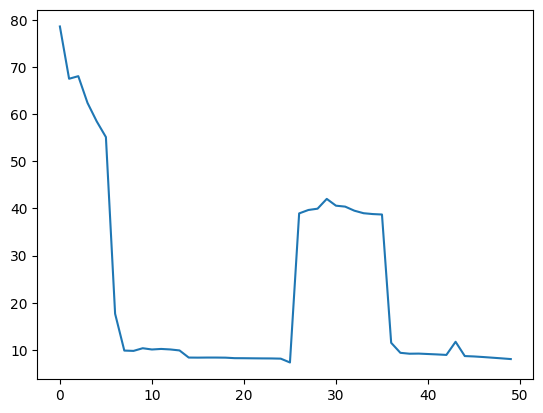

In [25]:

plt.plot(loss_hist)
plt.show()

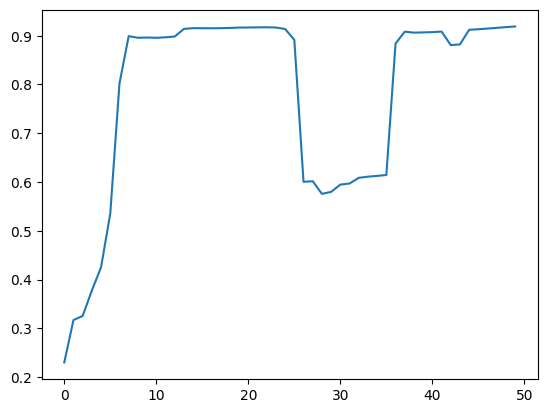

In [26]:
ac_track = []
for acc in acc_hist:
    ac_track.append(acc.item())
plt.plot(ac_track)
plt.show()

In [22]:
torch.save(model.state_dict(),'detector.pth')

In [18]:
test_set_input_pred = model(inputs_train)
test_set_input_pred = test_set_input_pred.round()

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [33]:
cm = classification_report(targets_train.cpu().detach().numpy(),test_set_input_pred.cpu().detach().numpy(),labels=[1,0])

In [35]:
print(cm)

              precision    recall  f1-score   support

           1       0.75      0.93      0.83    202710
           0       0.98      0.92      0.95    752391

    accuracy                           0.92    955101
   macro avg       0.87      0.92      0.89    955101
weighted avg       0.93      0.92      0.92    955101



In [20]:
def accuracy(targets_preds_cls,targets_test,inputs_test):
    acc = targets_preds_cls.eq(targets_test).sum() / float(inputs_test.shape[0])
    return acc

In [21]:
print(accuracy(test_set_input_pred,targets_train,inputs_train))

tensor(0.9193, device='cuda:0')
